In [2]:
import numpy as np
import pandas as pd
import os

runs=12
test=pd.read_csv('train.csv')

total_test_breathds=len(test['breath_id'].unique())
print(total_test_breathds)

breaths_per_run=(len(test['breath_id'].unique())/runs)+1

os.system('mkdir scripts')
os.system('mkdir outs')


for i in range(runs):
    with open(f'scripts/run{i}.sh','w+') as f:
        start=int(i*breaths_per_run)
        finish=int(min((i+1)*breaths_per_run,total_test_breathds))
        f.write(f'python3 find_pressure_w_triangle.py --start {start} --finish {finish}')

with open('find_pressure.sh','w+') as f:
    for i in range(runs):
        f.write(f'nohup bash scripts/run{i}.sh > outs/run{i}.out &\n')


75450


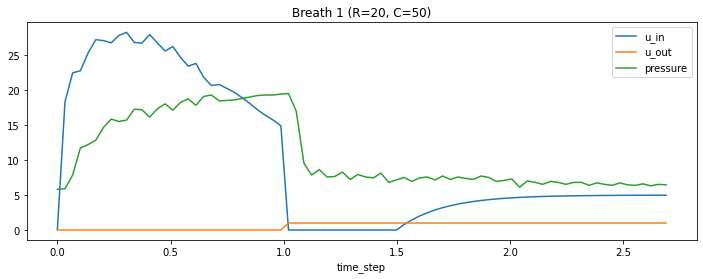

In [13]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12, 4))
test[test['breath_id'] == 1].set_index('time_step')[['u_in', 'u_out', 'pressure']].plot(ax=ax)
plt.title('Breath 1 (R=20, C=50)')
plt.show()

In [14]:
test[test['breath_id'] == 1]

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
75,76,1,20,50,2.553593,4.974474,1,6.399909
76,77,1,20,50,2.587754,4.978481,1,6.610815
77,78,1,20,50,2.621773,4.981847,1,6.329607
78,79,1,20,50,2.655746,4.984683,1,6.540513
